In [1]:
import textract
import os
import glob
import pandas as pd
import spacy #conda install -c conda-forge spacy
from spacy.lang.en import English
nlp = spacy.load("en")
from scipy import spatial
import seaborn as sns
#from spacy.en import English

In [2]:
'''
1. Get User Input of Folder with Pdfs
2. Glob in pdfs and Transform pdfs to text
3. Spacy Texts and Create w2v transformations
4. Create Cosine Distance Matrix
'''

'\n1. Get User Input of Folder with Pdfs\n2. Glob in pdfs and Transform pdfs to text\n3. Spacy Texts and Create w2v transformations\n4. Create Cosine Distance Matrix\n'

# 1. Input Folder of pdfs

In [2]:
relative_folder_path = 'pdfFolder'
pattern = os.path.join(os.getcwd(),relative_folder_path,'*.pdf')
print(pattern)

/Users/wsolomon/Documents/GitHub/pdfSimilarity/pdfFolder/*.pdf


# 2. Glob Files Together and Read Text

In [5]:
pdfs = glob.glob('./pdfFolder/*.pdf')
pdfs_column = []
label_column =[]
bad_stuff = ['/n']
for pdf in enumerate(pdfs):
    print(pdf[1])
    textTest = textract.process(pdf[1]).replace('\n',"")
    pdfs_column.append(textTest)
    label_column.append(pdf[0])

df = pd.DataFrame({'labels': label_column, 'text': pdfs_column})
df.head(10)

./pdfFolder/Slate Article Submission_Shakespeare and Skyscrapers_31May2017.pdf
./pdfFolder/CyberSecurity_ROI Essay_WHS_ver2.pdf
./pdfFolder/FinalPaper_Solomon_ver2.pdf
./pdfFolder/Sadybakasov_Alymbek_SotckFish.pdf
./pdfFolder/CyberSecurity_Backdoor Essay_WHS.pdf


,labels,text
0,0,Richard II and the Skyscraper Theory of Bubble...
1,1,IS ROI/IRR/NPV A GOOD MEASURE FOR CYBERSECURIT...
2,2,Electricity Sector Reforms in ColombiaDevelopm...
3,3,Combining Monte-Carlo TreeSearch with state-of...
4,4,SHOULD WE REQUIRE SOFTWARE COMPANIES TO PROGRA...


# 3. spaCy and Vectorize Texts

In [6]:
#Run in shell "python -m spacy download en"
#nlp = spacy.load("en")

vecs = []
for raw_text in pdfs_column:
    doc = nlp(raw_text.decode('utf8'))
    vecs.append(doc.vector)
df['vecs'] = vecs
df.head()


,labels,text,vecs
0,0,Richard II and the Skyscraper Theory of Bubble...,"[0.11485395, 0.44388837, 0.28940865, 0.8409925..."
1,1,IS ROI/IRR/NPV A GOOD MEASURE FOR CYBERSECURIT...,"[0.46202022, 0.36182055, 0.1345899, 0.84745115..."
2,2,Electricity Sector Reforms in ColombiaDevelopm...,"[0.33343694, 0.35287502, 0.2474912, 0.8941736,..."
3,3,Combining Monte-Carlo TreeSearch with state-of...,"[0.31502566, 0.5353322, 0.54613346, 0.9820281,..."
4,4,SHOULD WE REQUIRE SOFTWARE COMPANIES TO PROGRA...,"[0.48115247, 0.3245384, 0.2563125, 1.0423548, ..."


# 4. Create Cross CosineDistance Matrix

In [7]:
cosDist_main = []
#Create Cross Cosine Matrix:
for vec1s in vecs:
    cosDist_sub = []
    for vec2s in vecs:
        dist = spatial.distance.cosine(vec1s, vec2s)
        cosDist_sub.append(dist)
    cosDist_main.append(cosDist_sub)

df_cos = pd.DataFrame(cosDist_main)
df_cos.head()

,0,1,2,3,4
0,0.000000,0.034657,0.025327,0.039611,0.076007
1,0.034657,0.000000,0.032206,0.052575,0.030119
2,0.025327,0.032206,0.000000,0.039383,0.070168
3,0.039611,0.052575,0.039383,0.000000,0.078875
4,0.076007,0.030119,0.070168,0.078875,0.000000


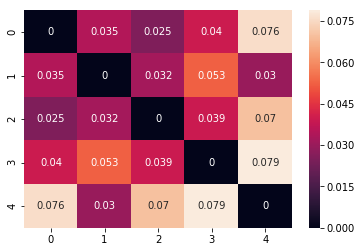

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_cos, annot=True)